# Imports

In [17]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Functions

In [18]:
def f1(x):
    return 1/(1+25*np.power(x,2))


In [19]:
def f2(x):
    return np.exp(np.cos(x))

In [20]:
#Interpolacja Lagrange'a
def lagrange(x, xs, ys):
    n = len(xs)
    y = 0
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * (x - xs[j])/(xs[i] - xs[j])
        y = y + p * ys[i]
    return y

In [21]:
def chebyshev_nodes(a, b, n):
    i = np.array(range(n))
    x = np.cos((2*i+1)*np.pi/(2*(n)))
    return 0.5*(b-a)*x+0.5*(b+a)

# Interpolation points

## Seed selection

In [22]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
rs = RandomState(MT19937(SeedSequence(420)))

## Random points

In [23]:
points_number = 500
x_f1 = rs.uniform(low=-1, high=1, size=points_number)
y_f1 = f1(x_f1)
x_f2 = rs.uniform(low=0, high=2*np.pi, size=points_number)
y_f2 = f2(x_f2)

## Nodes

In [24]:
nodes_number = np.arange(4,51,1,dtype=np.int32)

# Cubic interpolation

In [25]:
cubic_errors_f1 = []
cubic_errors_f2 = []
for n in nodes_number:
    f1_nodes_x = np.linspace(-1,1,n)
    f1_nodes_y = f1(f1_nodes_x)

    f2_nodes_x = np.linspace(0,2*np.pi, n)
    f2_nodes_y = f2(f2_nodes_x)

    f1_spline = CubicSpline(f1_nodes_x, f1_nodes_y)
    f2_spline = CubicSpline(f2_nodes_x, f2_nodes_y)
    
    f1_error = np.linalg.norm(y_f1 - f1_spline(x_f1))
    f2_error = np.linalg.norm(y_f2 - f2_spline(x_f2))

    cubic_errors_f1.append(f1_error)
    cubic_errors_f2.append(f2_error)

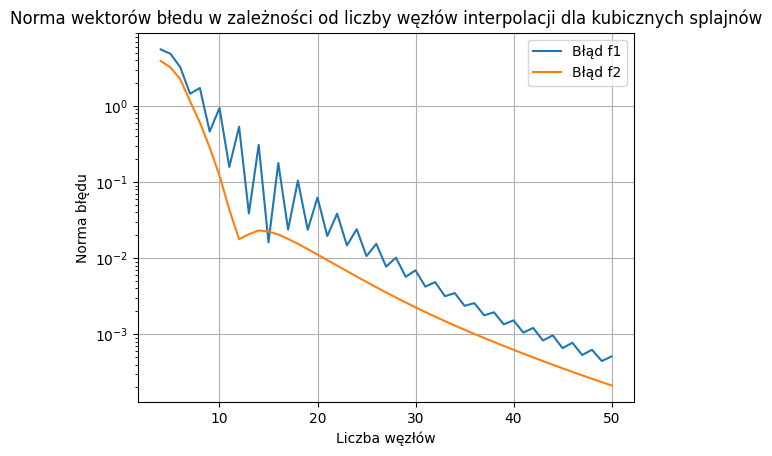

In [26]:
plt.semilogy(nodes_number, cubic_errors_f1, label="Błąd f1")
plt.semilogy(nodes_number, cubic_errors_f2, label="Błąd f2")
plt.grid()
plt.title("Norma wektorów błedu w zależności od liczby węzłów interpolacji dla kubicznych splajnów")
plt.legend()
plt.xlabel("Liczba węzłów")
plt.ylabel("Norma błędu")
plt.show()


# Lagrange interpolation

In [27]:
lagrange_errors_f1 = []
lagrange_errors_f2 = []
for n in nodes_number:
    f1_nodes_x = np.linspace(-1,1,n)
    f1_nodes_y = f1(f1_nodes_x)

    f2_nodes_x = np.linspace(0,2*np.pi, n)
    f2_nodes_y = f2(f2_nodes_x)
    
    lagrange_f1 = lagrange(x_f1, f1_nodes_x, f1_nodes_y)
    lagrange_f2 = lagrange(x_f2, f2_nodes_x, f2_nodes_y)

    error_f1 = np.linalg.norm(lagrange_f1 - y_f1)
    error_f2 = np.linalg.norm(lagrange_f2 - y_f2)

    lagrange_errors_f1.append(error_f1)
    lagrange_errors_f2.append(error_f2)

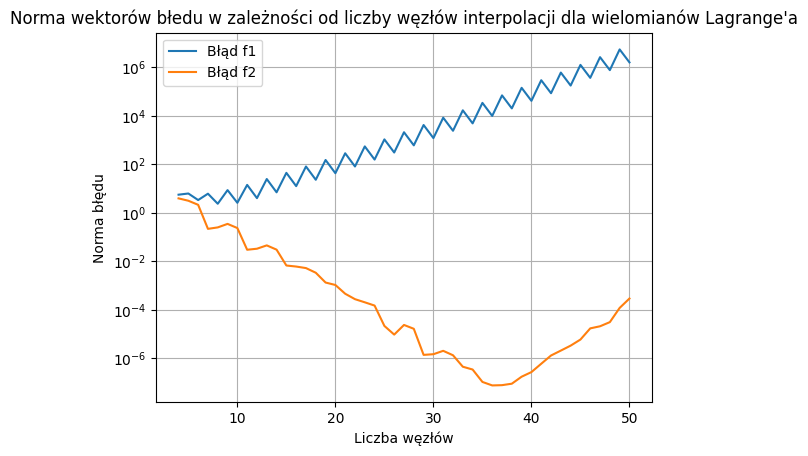

In [28]:
plt.semilogy(nodes_number, lagrange_errors_f1, label="Błąd f1")
plt.semilogy(nodes_number, lagrange_errors_f2, label="Błąd f2")
plt.grid()
plt.title("Norma wektorów błedu w zależności od liczby węzłów interpolacji dla wielomianów Lagrange'a")
plt.legend()
plt.xlabel("Liczba węzłów")
plt.ylabel("Norma błędu")
plt.show()

# Lagrange interpolation with Chebyshev nodes

In [29]:
chebyshev_errors_f1 = []
chebyshev_errors_f2 = []
for n in nodes_number:
    f1_nodes_x = chebyshev_nodes(-1,1,n)
    f1_nodes_y = f1(f1_nodes_x)

    f2_nodes_x = chebyshev_nodes(0,2*np.pi,n)
    f2_nodes_y = f2(f2_nodes_x)

    chebyshev_f1 = lagrange(x_f1, f1_nodes_x, f1_nodes_y)
    chebyshev_f2 = lagrange(x_f2, f2_nodes_x, f2_nodes_y)

    error_f1 = np.linalg.norm(chebyshev_f1 - y_f1)
    error_f2 = np.linalg.norm(chebyshev_f2 - y_f2)

    chebyshev_errors_f1.append(error_f1)
    chebyshev_errors_f2.append(error_f2)

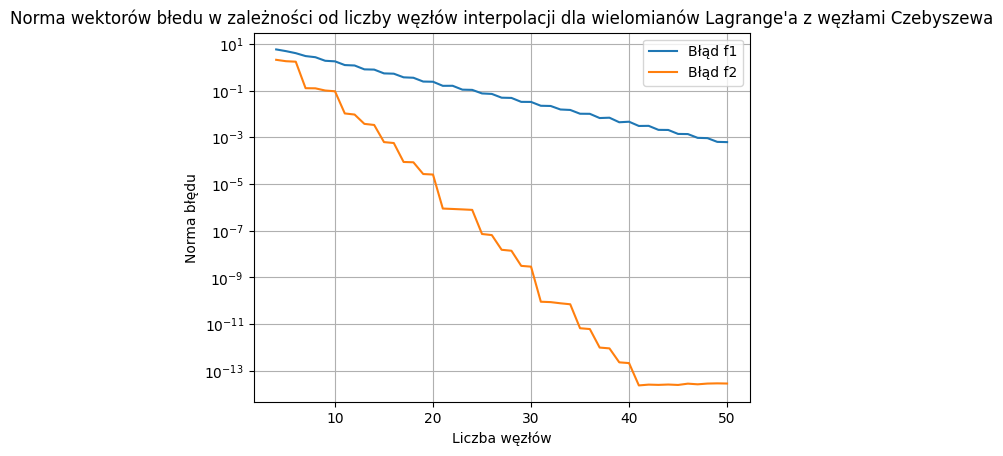

In [30]:
plt.semilogy(nodes_number, chebyshev_errors_f1, label="Błąd f1")
plt.semilogy(nodes_number, chebyshev_errors_f2, label="Błąd f2")
plt.grid()
plt.title("Norma wektorów błedu w zależności od liczby węzłów interpolacji dla wielomianów Lagrange'a z węzłami Czebyszewa")
plt.legend()
plt.xlabel("Liczba węzłów")
plt.ylabel("Norma błędu")
plt.show()

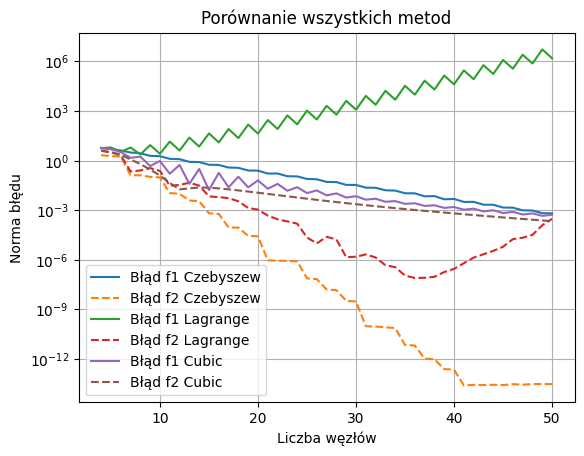

In [31]:
plt.semilogy(nodes_number, chebyshev_errors_f1, label="Błąd f1 Czebyszew")
plt.semilogy(nodes_number, chebyshev_errors_f2, label="Błąd f2 Czebyszew", linestyle="dashed")
plt.semilogy(nodes_number, lagrange_errors_f1, label="Błąd f1 Lagrange")
plt.semilogy(nodes_number, lagrange_errors_f2, label="Błąd f2 Lagrange", linestyle="dashed")
plt.semilogy(nodes_number, cubic_errors_f1, label="Błąd f1 Cubic")
plt.semilogy(nodes_number, cubic_errors_f2, label="Błąd f2 Cubic", linestyle="dashed")
plt.grid()
plt.title("Porównanie wszystkich metod")
plt.legend()
plt.xlabel("Liczba węzłów")
plt.ylabel("Norma błędu")
plt.show()

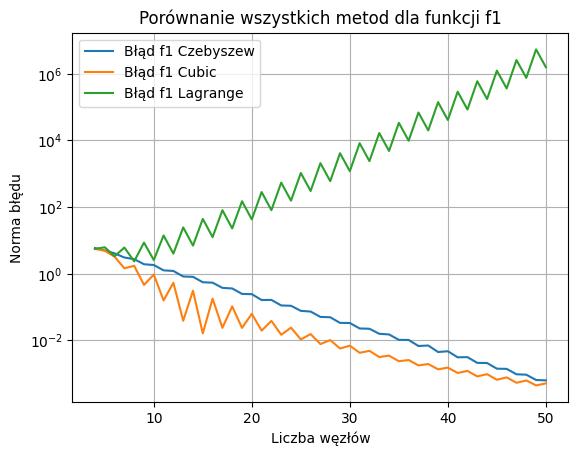

In [34]:
plt.semilogy(nodes_number, chebyshev_errors_f1, label="Błąd f1 Czebyszew")
plt.semilogy(nodes_number, cubic_errors_f1, label="Błąd f1 Cubic")
plt.semilogy(nodes_number, lagrange_errors_f1, label="Błąd f1 Lagrange")
plt.grid()
plt.title("Porównanie wszystkich metod dla funkcji f1")
plt.legend()
plt.xlabel("Liczba węzłów")
plt.ylabel("Norma błędu")
plt.show()

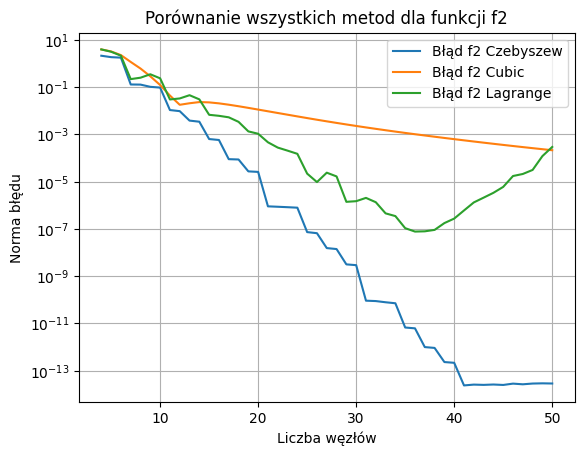

In [35]:
plt.semilogy(nodes_number, chebyshev_errors_f2, label="Błąd f2 Czebyszew")
plt.semilogy(nodes_number, cubic_errors_f2, label="Błąd f2 Cubic")
plt.semilogy(nodes_number,lagrange_errors_f2, label="Błąd f2 Lagrange")
plt.grid()
plt.title("Porównanie wszystkich metod dla funkcji f2")
plt.legend()
plt.xlabel("Liczba węzłów")
plt.ylabel("Norma błędu")
plt.show()